# 1- Integration and differentiation

## 1.1 - Differentiation

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def f(x, a, b, c, d):
    return a * np.sin(b*x+c)+d

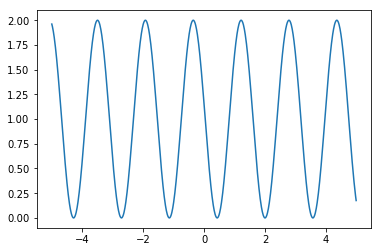

In [13]:
a, b, c, d = 1.0, 4.0, 3.0, 1.0
arr = (a, b, c, d)
dstep = 0.01
x = np.arange(-5, 5, dstep)
y = f(x, *arr)
plt.plot(x, y)
plt.show()

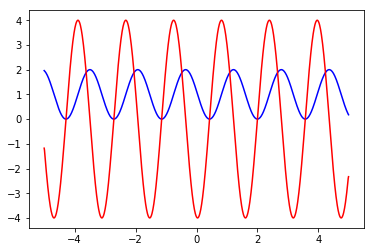

In [14]:
plt.plot(x, y, color='b')
plt.plot(x, np.gradient(y, dstep), color='r')
plt.show()

### 1.2.2 - Analytic solutions

In [23]:
import sympy as sp
from scipy.misc import derivative

In [24]:
x = sp.Symbol('x')

In [25]:
sp.diff('3*x**2 - 2*x + 5')

6*x - 2

In [26]:
sp.diff('2*x*sin(x)**2')

4*x*sin(x)*cos(x) + 2*sin(x)**2

In [21]:
#Numerical derivative value
def f(x):
    return 3*x**2 - 2*x + 5

In [22]:
print derivative(f, 0)

-2.0


## 1.1.3 - ODEs

$$ \tau \frac{\mathrm{d} y}{\mathrm{d} t} = -y + ku $$

In [37]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [38]:
def firstorder(y,t):
    tau = 5.0
    K= 2.0
    u = 1.0
    dydt = (-y + K*u)/tau    
    return dydt    

In [45]:
nsteps = 50
t = np.linspace(0,nsteps-1, nsteps)
y = odeint(firstorder, 0.0, t)

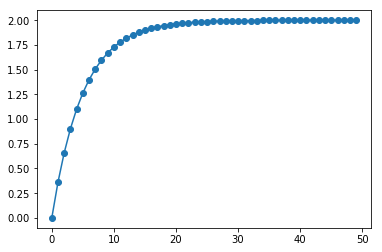

In [46]:
plt.plot(t, y, marker='o')
plt.show()

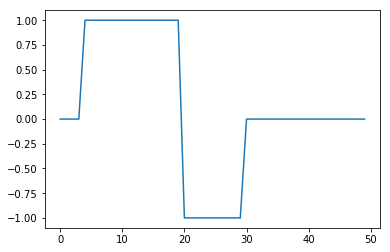

In [47]:
K = 2.0
u = np.zeros(nsteps)
u[4:] = 1.0
u[20:] = -1.0
u[30:] = 0.0
plt.plot(t,u)

In [48]:
def f_order(y,t,K,u):
    tau = 5.0
    dydt = (-y + K*u)/tau
    return dydt

In [49]:
ys = np.zeros(nsteps)
y0 = 0.0
ys[0] = y0
for i in range(nsteps-1):
    ts = [t[i], t[i+1]]
    y = odeint(f_order, y0, ts, args=(K, u[i]))
    y0 = y[1]
    ys[i] = y0

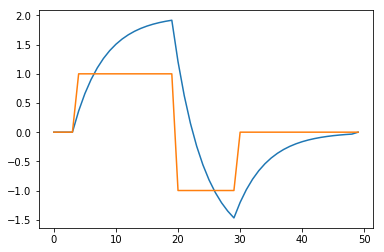

In [50]:
plt.plot(t,ys)
plt.plot(t,u)

## 1.2 - Integration

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import *

Define a function:

In [3]:
def f(x):
    return x**2 - 5.0*x - 8.0

In [4]:
x_min = -5.0
x_max = 10.0
x = np.arange(x_min, x_max, .1)

Make the next plot step by syep to remember spectators.

<IPython.core.display.Javascript object>


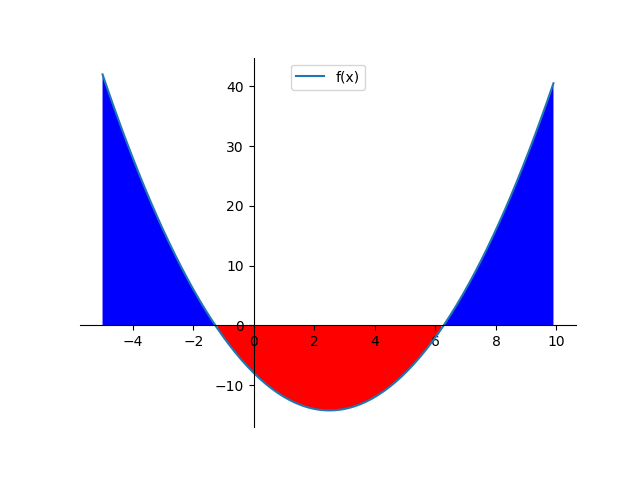

In [5]:
ax = plt.gca()
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
plt.plot(x, f(x), label='f(x)')
plt.legend(loc='upper center')
plt.fill_between(x, f(x), 0, where=f(x) >= 0, facecolor='blue')
plt.fill_between(x, f(x), 0, where=f(x) <= 0, facecolor='red')
plt.show()

In [ ]:
I, err = quad(f, x_min, x_max)
print "Integral =", I
print "Error =", err

In [ ]:
def g(x, a, b, c, d):
    return a*np.exp(-b*x+c)+d

In [ ]:
a = 1.0
b = 1.0
c = -3.0
d = 0.0
ax = plt.gca()
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
plt.plot(x, g(x, a, b, c, d), label='g(x)')
plt.legend()
plt.show()

In [ ]:
a = 1.0
b = 1.0
c = -3.0
d = 0.0
#Tupple with the function arguments
arr = (a, b, c, d)
#Start plotting
ax = plt.gca()
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
plt.plot(x, g(x, *arr), label='g(x)')
plt.legend()
plt.show()

In [ ]:
I, err = quad(g, x_min, x_max, args=arr)
print "Integral =", I
print "Error =", err

Comparing the same function, but with different arguments:

In [ ]:
arr1 = (1.0, 1.0, -3.0, -0.5)
arr2 = (1.0, 1.0, -3.0, 0.0)

In [ ]:
ax = plt.gca()
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
plt.plot(x, g(x, *arr1))
plt.plot(x, g(x, *arr2))
plt.show()

In [ ]:
I, err = quad(g, x_min, x_max, args=arr1)
print "Integral =", I
print "Error =", err

In [ ]:
I, err = quad(g, x_min, x_max, args=arr2)
print "Integral =", I
print "Error =", err

## 2-D Integration

Now for a 2-D case:

In [ ]:
def z(x, y):
    return np.cos(x)+np.sin(y)

In [ ]:
x = np.arange(-3,3,.05)
y = np.arange(-3,3,.05)

In [ ]:
print x

In [ ]:
X, Y = np.meshgrid(x, y)
X

In [ ]:
plt.pcolor(X, Y, z(X, Y), cmap='jet')
plt.colorbar()
plt.show()

Put this example in 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z(x, y), cmap='jet',
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = np.meshgrid(x, y)

# Plot the surface.
surf = ax.plot_surface(X, Y, z(X, Y), cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)

plt.xlabel('X')
plt.ylabel('Y')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
I, err = nquad(z, [[-3, 3],[-3, 3]])
print "Integral =", I
print "Error =", err

Can we do something more complicated?

Consider (from the scipy example):

$$\Large{I_N = \int_{0}^{+\infty}\int_{1}^{+\infty} \frac{e^{-xt}}{t^{N}} \mathrm{d}t\mathrm{d}x}$$

In [ ]:
N = 10.0
def f2(t, x):
    return np.exp(-x*t)/(t**N)
I, err = nquad(f2, [[1, np.inf],[0, np.inf]])
print "Integral =", I
print "Error =", err

In [ ]:
np.__version__